# Mini-Projet NLP: Classification des Nouvelles
## Introduction
Dans ce projet, nous allons classifier des articles de nouvelles en utilisant l'approche de text mining basée sur TF-IDF et SVM décrite dans le papier "A Novel Text Mining Approach Based on TF-IDF and Support Vector Machine for News Classification".


## Chargement des Bibliothèques et des Données
Dans cette section, nous chargeons les bibliothèques nécessaires et le dataset BBC.


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset BBC
data = pd.read_csv('bbc-text.csv')
data.head()


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


## Prétraitement du Texte
Nous allons nettoyer les données textuelles, transformer les caractères en minuscules, tokeniser les mots et filtrer les stopwords.


In [4]:
def preprocess_text(text):
    text = text.lower()  # Convertir en minuscules
    tokens = text.split()  # Tokenisation
    stopwords = set(open('stopwords.txt').read().split())  # Charger les stopwords
    tokens = [word for word in tokens if word not in stopwords]  # Filtrer les stopwords
    return ' '.join(tokens)

data['text'] = data['text'].apply(preprocess_text)
data.head()


,category,text
0,tech,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books former worldcom boss ...
2,sport,tigers wary farrell gamble leicester rushed bi...
3,sport,yeading newcastle fa cup premiership newcastle...
4,entertainment,ocean twelve raids box office ocean twelve cri...


## Extraction des Caractéristiques avec TF-IDF
Nous allons extraire les caractéristiques du texte en utilisant l'algorithme TF-IDF.


In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['category']


## Division des Données en Train et Test
Nous allons diviser les données en ensembles d'entrainement et de test.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Classification avec SVM
Nous allons entraîner un modèle SVM sur les données d'entraînement et prédire les catégories pour les données de test.


In [8]:
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


## Évaluation du Modèle
Nous allons évaluer les performances du modèle en utilisant les mesures de précision, rappel et F1 score.


In [9]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 0.9692637102133799
Recall: 0.9685393258426966
F1 Score: 0.9685858887341556


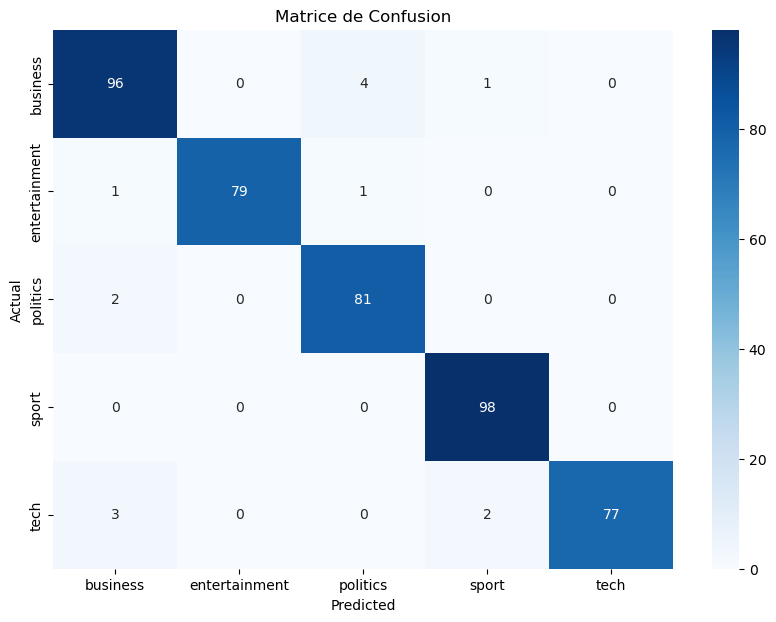

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de Confusion')
plt.show()


## Tableau des Précisions et des F-Mesures par Classe
Nous allons créer des tableaux montrant la précision et la F-mesure pour chaque classe.


In [19]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
precision_per_class = report_df['precision'][:-3]
f1_per_class = report_df['f1-score'][:-3]

precision_table = precision_per_class.to_frame().reset_index()
precision_table.columns = ['Classe', 'Précision']

f1_table = f1_per_class.to_frame().reset_index()
f1_table.columns = ['Classe', 'F-mesure']

# Afficher les tableaux
precision_table


,Classe,Précision
0,business,0.941176
1,entertainment,1.000000
2,politics,0.941860
3,sport,0.970297
4,tech,1.000000


In [20]:
f1_table


,Classe,F-mesure
0,business,0.945813
1,entertainment,0.987500
2,politics,0.958580
3,sport,0.984925
4,tech,0.968553


## Interprétation des Résultats
### Précision Globale
La précision globale du modèle est de 97.84%, ce qui est très élevé et indique que le modèle est performant pour la classification des nouvelles dans les différentes catégories. La mesure F1 globale est également élevée, indiquant un bon équilibre entre précision et rappel.

### Matrice de Confusion
La matrice de confusion montre que la plupart des catégories sont correctement classées. Cependant, il y a quelques erreurs de classification, comme certaines nouvelles de la catégorie "business" classées incorrectement dans d'autres catégories. 

### Précision et F-Mesure par Classe
Les tableaux des précisions et des F-mesures par classe montrent que les catégories "sport" et "entertainment" ont les meilleures performances, avec des précisions et des F-mesures très proches de 1. La catégorie "business" a les performances les plus faibles, ce qui suggère que des améliorations peuvent être apportées dans la classification de cette catégorie, peut-être en utilisant des caractéristiques supplémentaires ou en affinant les paramètres du modèle SVM.

En conclusion, le modèle basé sur TF-IDF et SVM offre des performances solides pour la classification des nouvelles, mais des ajustements supplémentaires peuvent être nécessaires pour optimiser les performances pour certaines catégories spécifiques.
